## Import libraries 

In [135]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import bqplot
from bqplot import *
from IPython.display import display
import ipywidgets as widgets
from bqplot import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import HBox, VBox, Dropdown, SelectMultiple

## Read data 

In [2]:
df_total = pd.read_excel('merged_data.xlsx')

In [3]:
# # # dataframe that only contains files with persons information
df = df_total[df_total['Id_person'].notna()]

# Data cleaning and statistical analysis

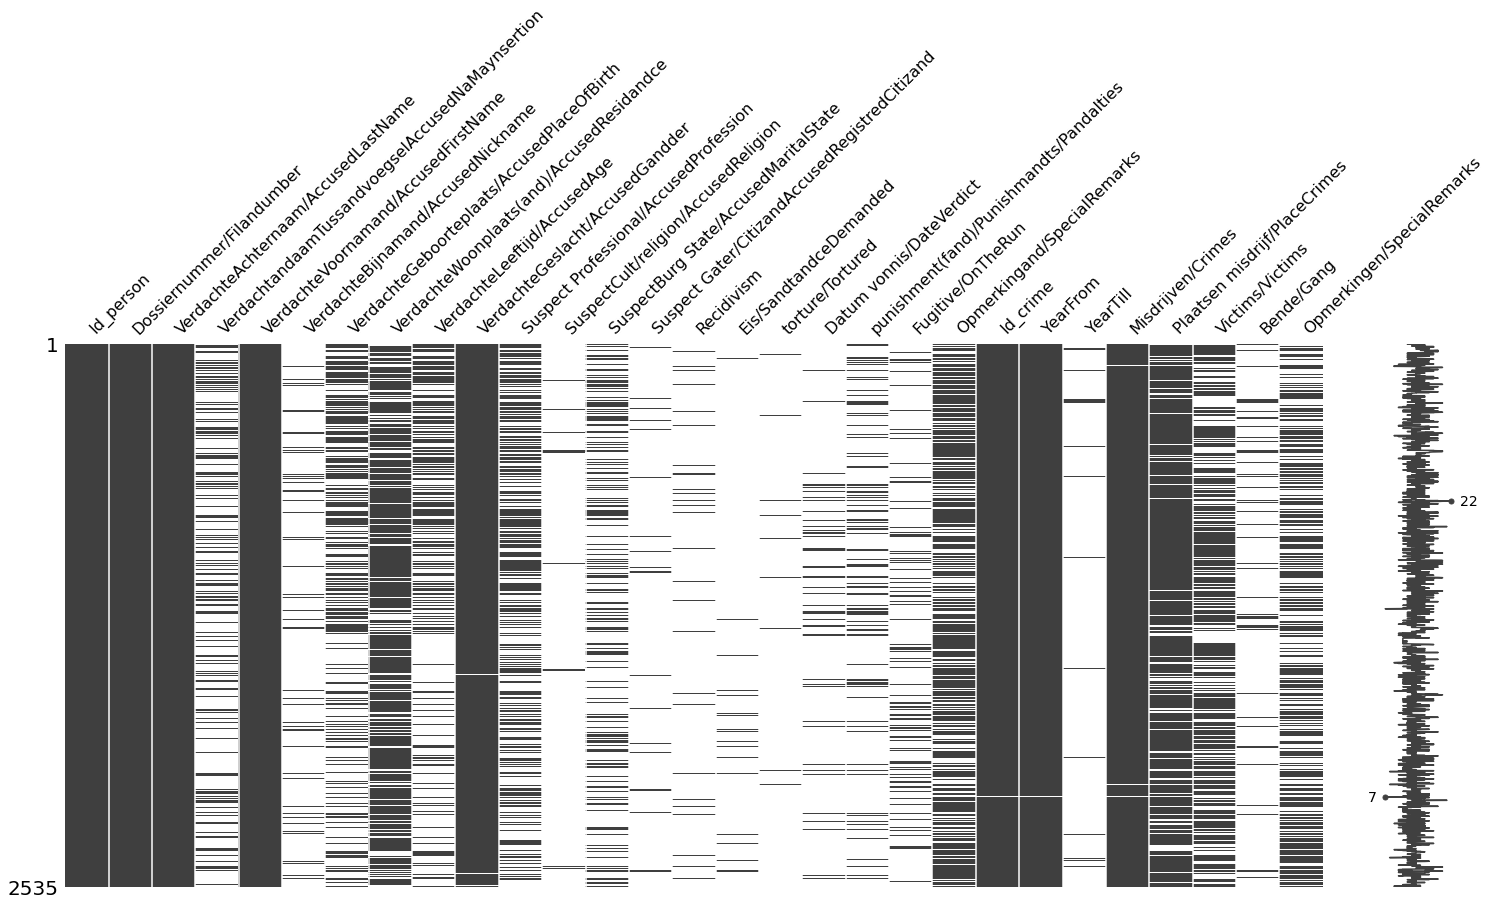

In [4]:
# # # Check missing values
msno.matrix(df)

### Data pre-processing for punishment 

#### Overview of punishment 

In [5]:
# # # Check missing values
df['punishment(fand)/Punishmandts/Pandalties'].notna().value_counts()

False    2122
True      413
Name: punishment(fand)/Punishmandts/Pandalties, dtype: int64

In [6]:
x = 413/2122
x

0.1946277097078228

In [7]:
np.sort(df['punishment(fand)/Punishmandts/Pandalties'].dropna().unique())

array(['100 dukats', 'Breda disciplinary candter',
       'Forgiveness is a question of God and the Justice',
       'absent banishment - 25 years',
       'absent; floggging - with noose around neck; punishmandt 3 banishment - 24 years',
       'acquittal', 'acquittal - conditional', 'acquitted', 'banishment',
       'banishment  - galeiand', 'banishment -  eternal',
       'banishment - 1 year', 'banishment - 10 year',
       'banishment - 10 year; led out of the city with a rod around his neck',
       'banishment - 10 years', 'banishment - 12 year',
       'banishment - 12 year; fine - 100 gl; punishment 3 expiration of office',
       'banishment - 12 years', 'banishment - 12 years to East Indie',
       'banishment - 15 year', 'banishment - 15 years; costs process',
       'banishment - 19 years; fine - 100 gl; punishment 3 costs',
       'banishment - 2 year',
       'banishment - 2 year; confiscation of property',
       'banishment - 20 year; pillory with a rod, bound around t

In [8]:
# # # key words for each main category of punishment:
key_words = {'dukats': 'fine', 
             'fine':'fine', 
             'disciplinary': 'prison', 
             'God':'ask forgiveness from God and the Justice', 
             'forgiving':'ask forgiveness from God and the Justice',
             'ban':'banishment',
             'absent basket':'branding (with a hot iron mark)',
             '; absent':'branding (with a hot iron mark)',
             'absent;':'branding (with a hot iron mark)',
             'absent,':'branding (with a hot iron mark)', 
             'brand':'branding (with a hot iron mark)',
             'floggging':'floggging',
             'acquit':'acquittal',
             'out of':'out of the city',
             'office': 'expiration of office', 
             'cost':'costs',
             'confiscation of property':'confiscation of property',
             'teased':'pillory','pillory':'pillory',
             'tooth':'pillory',
             'Lean Soup':'prison',
             'city running':'city running',
             'composible':'diverse',
             'conditional':'conditional release',
             'confine':'confinement',
             'death':'death penalty',
             'straightened':'death penalty',
             'cut off hand':'cut off hand',
             'baked':'baked','hanging':'hanging',
             'decapitation':'decapitation',
             'discharged':'discharged',
             'dismiss':'dismissed',
             'drag':'dragged',
             'display':'on display',
             'exhibit':'on display',
             'show':'on display',
             'pilgrimage':'pilgrimage',
             'prison':'prison',
             'water and bread':'prison',
             'remand':'remand',
             'spin house':'prison',
             'Gewandhuis':'around the Gewandhuis'
            }

In [9]:
punish_categories = ['fine', 
       'acquittal', 'death penalty', 'banishment',
       'branding (with a hot iron mark)', 'on display', 'costs',
       'decapitation', 'prison', 'dismissed', 'discharged', 'hanging',
       'floggging', 'baked',  'dragged', 'pillory',
       'out of the city', 'expiration of office', 'confinement', 'remand',
       'confiscation of property', 'cut off hand', 'diverse',
       'around the Gewandhuis', 'ask forgiveness from God and the Justice',
       'city running', 'conditional release', 'pilgrimage']

In [10]:
df1 = df.copy()
for i in punish_categories:
    df1[i] = 0
df1

,Id_person,Dossiernummer/Filandumber,VerdachteAchternaam/AccusedLastName,VerdachtandaamTussandvoegselAccusedNaMaynsertion,VerdachteVoornamand/AccusedFirstName,VerdachteBijnamand/AccusedNickname,VerdachteGeboorteplaats/AccusedPlaceOfBirth,VerdachteWoonplaats(and)/AccusedResidandce,VerdachteLeeftijd/AccusedAge,VerdachteGeslacht/AccusedGandder,...,confinement,remand,confiscation of property,cut off hand,diverse,around the Gewandhuis,ask forgiveness from God and the Justice,city running,conditional release,pilgrimage
0,1.0,064-08,Aalst,van,Cornelis,NaN,NaN,Vught,NaN,man,...,0,0,0,0,0,0,0,0,0,0
1,1070.0,064-08,Smulders of Smolders,NaN,Gijsbert,NaN,NaN,Vught,NaN,man,...,0,0,0,0,0,0,0,0,0,0
2,2.0,099-01,Aa,van der,Dirk Jansand,NaN,NaN,Sint-Michielsgestel,NaN,man,...,0,0,0,0,0,0,0,0,0,0
3,901.0,099-01,Meurs,NaN,Elbertus,NaN,NaN,NaN,23,man,...,0,0,0,0,0,0,0,0,0,0
4,3.0,155-04,Abbema,NaN,Wouter,NaN,s-Hertogandbosch,s-Hertogandbosch,46,man,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2580.0,180-05,Altanda,van,Handdrik,NaN,NaN,s-Hertogandbosch,NaN,man,...,0,0,0,0,0,0,0,0,0,0
2531,2581.0,180-06,Decaand,NaN,Giel,NaN,NaN,Rijssel,25,man,...,0,0,0,0,0,0,0,0,0,0
2532,2582.0,180-06,Marcq,NaN,Michel,NaN,Calais,NaN,32,man,...,0,0,0,0,0,0,0,0,0,0
2533,2583.0,180-07,Verwetering - Wetering,NaN,Gerrit Gerrits,NaN,NaN,NaN,NaN,man,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# # # Create a new dataframe, named "df1":
df1 = df.copy()
for i in punish_categories:
    df1[i] = 0

for i in range(0, len(df1)):
    punishment = str(df1.loc[int(i), 'punishment(fand)/Punishmandts/Pandalties'])
    if punishment == 'nan':
        for k in punish_categories:
            df1.loc[i,k] = float("nan")
        continue
    for j in key_words.keys():
        if j in punishment:
            df1.loc[i, key_words[j]] = 1


In [12]:
# # # count each catetory
df1[punish_categories].sum().sort_values(ascending=False)

banishment                                  221.0
floggging                                    98.0
fine                                         41.0
death penalty                                41.0
prison                                       38.0
hanging                                      29.0
discharged                                   20.0
acquittal                                    18.0
costs                                        18.0
branding (with a hot iron mark)              17.0
pillory                                      13.0
out of the city                              12.0
decapitation                                  8.0
diverse                                       7.0
expiration of office                          6.0
conditional release                           4.0
on display                                    4.0
around the Gewandhuis                         4.0
dragged                                       3.0
dismissed                                     3.0


#### Fine 

In [13]:
fine = df1[df1['fine'] == 1].reset_index()[['Id_person','punishment(fand)/Punishmandts/Pandalties']]
fine['money'] = fine['punishment(fand)/Punishmandts/Pandalties'].apply(lambda x: re.findall(r'fine\s-\s(\d+\s..)', x))

for i in range(0,len(fine)):
    try:
        fine.loc[i,'amount'] = fine.loc[i,'money'][0]
    except:
        print(i)
        print(fine.loc[i,'punishment(fand)/Punishmandts/Pandalties'])
fine.loc[36,'amount'] = '200 µl'

14
confinemandt - 36 years under the jurisdiction of the Ganderality to win a living with his hands
17
100 dukats
26
guild fine; costs
36
confinement - life snake; water and bread on Monday, Wednesday and Friday
37
three times around the Gewandhuis; fine of 200 µl. in front of the burned down Sint-Janskerk; punishment 3 without hood on both knees with bound hands and sayings with a loud voice: The incident happened through devilish inspiration.
39
fine + suspension as crane child for 3 weeks


In [14]:
fine

,Id_person,punishment(fand)/Punishmandts/Pandalties,money,amount
0,2.0,fine - 25 guild,[25 gu],25 gu
1,108.0,banishment - 6 year; fine - 50 gl,[50 gl],50 gl
2,138.0,fine - 100 gl,[100 gl],100 gl
3,144.0,fine - 25 gl,[25 gl],25 gl
4,146.0,fine - 50 gl,[50 gl],50 gl
5,147.0,fine - 50 gl,[50 gl],50 gl
6,288.0,fine - 50 gl,[50 gl],50 gl
7,289.0,fine - 50 gl.,[50 gl],50 gl
8,312.0,guildfine - 150 gl,[150 gl],150 gl
9,432.0,fine - 300 µl.; lapsing from the sandior office,[300 µl],300 µl


### Data pre-processing for Crimes 

In [15]:
# # # key words for each main category of Crime:
key_words_crimes = {'killing': 'Killing',
      'burglary': 'Burglary',
      'threat' : 'Threat',
      'maltreatment' : 'Ill-treatment',
      'criminal' : 'Assault',
      'extortion' : 'Extortion',
      'outlawry' : 'Outlawry', #not obeying the ban, sentence of outlawry
      'begging' : 'Begging',
      'fraud' : 'Fraud',
      'forgery' : 'Fraud', 
      'forged': 'Fraud',
      'theft': 'Theft',
      'violence' : 'Violence', # 3, (street) vandalism and violence
      'trading ' : 'Trading with enemy',
      'enemy' : 'Trading with enemy',
      'prostitution' : 'Prostitution', #2
      'evasion' : 'Evasion', # evasion impost, evasion impost on beer, tax evasion, tax-dodging
      'escape' : 'Escape', # letting escape of a prisoner, illegal freeing pounded sheep, 
      #'freeing' : 'Escape', 
       'kidnapping' : 'Kidnapping',
       'cheating' : 'Cheating', # cheating (cardplay, dices),swindle, cheating (in case of changing money),swindle, cheating
       'violating' : 'Violating',
       'looting' : 'Looting', #??? ip_crime: 14, 55
        'destruction' : 'Destruction',
        'destroying' : 'Destruction',
        'digging' : 'Destruction',
        'forbidden' : 'Forbidden',
        'unallowd' : 'Forbidden',
        #'possession' : 'Forbidden',
        #'embezzle' : 'Embezzle',
        'resistance' : 'Resistance',
        'refusing' : 'Refusing', #4: niet reinigen Blok,refusing to billet troops in a house,refusing to clean the public street,
        #refusing to make a(n incriminating / implicating), 
        'suicide' : 'Suicide',
        'adultery': 'Adultery',
        'bigamy' : 'Bigamy',
        'robbery': 'Robbery',
        'pocketing' : 'Robbery',
         'barrage' : 'Barrage',#2
         'disturb': 'Disturb public order',
         'revolt' : 'Disturb public order',
         'mob' : 'Disturb public order',
         "one's" : 'Disturb public order',
         'hooliganism' : 'Robbery',
         'offending' : 'Offending', 
         'illegal' : 'Illegal'}

In [16]:
crime_categories = ['Illegal', 'Offending', 'Disturb public order', 'Robbery','Barrage','Bigamy',
                    'Adultery', 'Suicide', 'Refusing', 'Resistance', 'Forbidden', 
                    'Destruction', 'Looting','Violating','Cheating', 'Kidnapping', 'Escape',
                    'Evasion', 'Prostitution', 'Trading with enemy', 'Violence', 'Theft', 'Fraud',
                     'Begging', 'Outlawry', 'Extortion', 'Assault', 'Ill-treatment', 'Threat', 'Burglary','Killing']#'Embezzle'

In [17]:
for i in crime_categories:
    df1[i] = 0
for i in range(0, len(df1)):
    crime = str(df1.loc[int(i), 'Misdrijven/Crimes'])
    if crime == 'nan':
        for k in crime_categories:
            df1.loc[i,k] = float("nan")
        continue
    for j in key_words_crimes.keys():
        if j in crime:
            df1.loc[i, key_words_crimes[j]] = 1
#         else:
#             df1.loc[i, key_words_crimes[j]] = 0

In [18]:
# # # count each catetory
df1[crime_categories].sum().sort_values(ascending=False)

Killing                 505.0
Ill-treatment           500.0
Theft                   500.0
Begging                 404.0
Threat                  257.0
Burglary                148.0
Offending               141.0
Fraud                   119.0
Violence                113.0
Prostitution            100.0
Disturb public order     81.0
Outlawry                 71.0
Extortion                66.0
Robbery                  57.0
Destruction              44.0
Adultery                 38.0
Illegal                  27.0
Assault                  24.0
Escape                   20.0
Violating                17.0
Looting                  15.0
Cheating                 15.0
Trading with enemy       14.0
Resistance               13.0
Suicide                  13.0
Evasion                  13.0
Barrage                  12.0
Refusing                  9.0
Kidnapping                9.0
Bigamy                    4.0
Forbidden                 2.0
dtype: float64

In [19]:
df1.columns

Index(['Id_person', 'Dossiernummer/Filandumber',
       'VerdachteAchternaam/AccusedLastName',
       'VerdachtandaamTussandvoegselAccusedNaMaynsertion',
       'VerdachteVoornamand/AccusedFirstName',
       'VerdachteBijnamand/AccusedNickname',
       'VerdachteGeboorteplaats/AccusedPlaceOfBirth',
       'VerdachteWoonplaats(and)/AccusedResidandce',
       'VerdachteLeeftijd/AccusedAge', 'VerdachteGeslacht/AccusedGandder',
       'Suspect Professional/AccusedProfession',
       'SuspectCult/religion/AccusedReligion',
       'SuspectBurg State/AccusedMaritalState',
       'Suspect Gater/CitizandAccusedRegistredCitizand', 'Recidivism',
       'Eis/SandtandceDemanded', 'torture/Tortured',
       'Datum vonnis/DateVerdict', 'punishment(fand)/Punishmandts/Pandalties',
       'Fugitive/OnTheRun', 'Opmerkingand/SpecialRemarks', 'Id_crime',
       'YearFrom', 'YearTill', 'Misdrijven/Crimes',
       'Plaatsen misdrijf/PlaceCrimes', 'Victims/Victims', 'Bende/Gang',
       'Opmerkingen/SpecialRe

In [20]:
df1['torture/Tortured'] = df1['torture/Tortured'].fillna('untortured')

## Data visualization 

### bqplot

The heatmap of punishment and crimes:

In [29]:
cor = df1[punish_categories+crime_categories].corr()[:len(punish_categories)][crime_categories]

In [33]:
fig  = plt.figure(title="Correlation Heatmap")

axes_options = {'color': {'orientation': "vertical","side":"right"}}

plt.heatmap(color=cor, axes_options=axes_options)

plt.show()

The overview of punishment : bar chart

In [123]:
punishment = df1[punish_categories].sum().sort_values(ascending=True).apply(lambda x: int(x))

sc_ord = OrdinalScale()
y_sc_rf = LinearScale()

bar_chart = Bars(x=punishment.index, y = punishment.values,
             scales={'x': sc_ord, 'y': y_sc_rf},
             orientation = 'horizontal',
            )
bar_chart.tooltip = Tooltip(fields=["x", "y"], labels=["Punishment", "Counts"])

ord_ax = Axis(label='Punishment', scale=sc_ord, orientation='horizontal', 
              grid_lines='none',side = 'left', label_offset = '-200', tick_style={'font-size': 12}, 
             )
y_ax = Axis(label='Counts', scale=y_sc_rf, orientation='horizontal', grid_lines='solid')

fig = Figure(axes=[ord_ax, y_ax],  marks=[bar_chart],fig_margin={'top':30, 'bottom':30, 'left':250, 'right':30}) 
display(fig)

Figure(axes=[Axis(grid_lines='none', label='Punishment', label_offset='-200', scale=OrdinalScale(), side='left…

In [24]:
fig = plt.figure(title="Bar chart of punishment with pyplot", fig_margin={'top':50, 'bottom':50, 'left':250, 'right':150},)


bar_chart  = plt.barh(x = list(punishment.index), y= list(punishment.values))

bar_chart.colors = ["tomato"]

bar_chart.tooltip = Tooltip(fields=["x", "y"], labels=["Punishment", "Counts"])

plt.ylabel("counts")

plt.show()

The distribution of the amounts of money in fine

In [25]:
fig = plt.figure(title="Bar chart of fine with pyplot", fig_margin={'top':50, 'bottom':50, 'left':150, 'right':150},)

bar_chart  = plt.bar(x = list(fine['amount'].value_counts().sort_values(ascending=False).index), y= list(fine['amount'].value_counts().sort_values(ascending=False).values))

bar_chart.colors = ["tomato"]

bar_chart.tooltip = Tooltip(fields=["x", "y"], labels=["Amount of Money", "Counts"])

plt.ylabel("counts")

plt.show()

Which crimes may lead to torture?

In [26]:
fig = plt.figure(title="Bar chart of crimes (untortured/tortured) with pyplot", fig_margin={'top':50, 'bottom':50, 'left':150, 'right':150},)

crimes = df1.groupby('torture/Tortured').sum()[crime_categories].T
crimes['total'] = crimes['Subject to torture']+crimes['untortured']
crimes = crimes.sort_values('total', ascending = True)

bar_chart  = plt.barh(x = list(crimes.index), y= [list(crimes['untortured']), list(crimes['Subject to torture'])], 
                      labels = ['untortured', 'tortured'])

bar_chart.colors = bqplot.CATEGORY10

bar_chart.type = "stacked"

bar_chart.tooltip = Tooltip(fields=["x", "y"], labels=["Crimes", "Untortured/Tortured"])

plt.ylabel("counts")

plt.show()

### Stories

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1.columns

In [ ]:
df1.groupby(['VerdachteAchternaam/AccusedLastName','VerdachtandaamTussandvoegselAccusedNaMaynsertion','VerdachteVoornamand/AccusedFirstName']).count().sort_values('Id_person', ascending=False)

In [ ]:
df1[(df1['VerdachteAchternaam/AccusedLastName']=='Beresteijn') & (df1['VerdachtandaamTussandvoegselAccusedNaMaynsertion']=='van') & (df1['VerdachteVoornamand/AccusedFirstName']=='Christiaand Paulus')]

In [ ]:
df1[df1[]]

### Interactive graphs 

In [203]:
punishment = df1[punish_categories].sum().sort_values(ascending=True).apply(lambda x: int(x)).reset_index().rename(columns = {'index':'punishment',0:'counts'})
crime = df1[crime_categories].sum().sort_values(ascending=True).apply(lambda x: int(x)).reset_index().rename(columns = {'index':'crime',0:'counts'})

# # # titles and style
selected_opacity = 1
unselected_opacity = 0.5
_figure_title_style_ = {'font-size': '9pt'}
_bar_title_ = 'Bar chart of {0}'
_histogram_title_ = 'Histogram of {0}'

box_color = "black"
sc_x = LinearScale()

# ax_top = Axis(scale=sc_x, color=box_color, side='top', tick_style={'font-size':0})
# ax_right = Axis(scale=sc_x, color=box_color, side='right', tick_style={'font-size':0})
# ax_left = Axis(scale=sc_x, color=box_color,  side='left', tick_style={'font-size':0})
# ax_bottom = Axis(scale=sc_x, color=box_color, side='bottom', tick_style={'font-size':0})
ax_top = Axis(scale=sc_x, color=box_color, side='top', num_ticks=0)
ax_right = Axis(scale=sc_x, color=box_color, side='right', num_ticks=0)
ax_left = Axis(scale=sc_x, color=box_color,  side='left', num_ticks=0)
ax_bottom = Axis(scale=sc_x, color=box_color, side='bottom', num_ticks=0)



# # # Selection
    # Select punishment
feature_punishment = SelectMultiple(
    options=punish_categories,
    value=punish_categories,
    #rows=10,
    description='Punishment',
    disabled=False
)

feature_crime = SelectMultiple(
    options=crime_categories,
    value=crime_categories,
    #rows=10,
    description='Crime',
    disabled=False
)


# # # data used here



# # # Bar chart of Punishment
    # scales
x_ord_punishment = OrdinalScale()
y_lin_punishment = LinearScale()

    # ax
ax_x_punishment = Axis(scale=x_ord_punishment, 
                tick_style={'font-size':12}, 
                label='punishment', 
                color=box_color,
                orientation='vertical',
                label_offset = '-200',
                tick_values=punishment.index)

ax_y_punishment = Axis(scale=y_lin_punishment,
                       orientation='horizontal',
                       label = 'counts',
                       color=box_color,
                       num_ticks=5)

    # figure
punishment_bar = Bars(x=punishment.punishment.values,
               y=punishment.counts.values,
               scales={'x': x_ord_punishment, 'y':y_lin_punishment},
               orientation='horizontal',
               interactions={'click': 'select','hover':'tooltip'},
               selected_style={'opacity': 1.0},
               unselected_style={'opacity': 0.5},
               tooltip = Tooltip(fields=["x", "y"], labels=["Punishment", "Counts"]),
               selected=range(0,len(punishment)),
               )

f_bar_punishment = Figure(axes=[ax_x_punishment, ax_y_punishment, ax_bottom, ax_left],
                       background_style={'fill':'white'}, #css is inserted directly
                       marks=[punishment_bar], 
                       min_aspect_ratio=1,
                       max_aspect_ratio=1,
                       fig_margin =  {"top":30, "bottom":60, "left":225, "right":80},
                       title = _bar_title_.format('punishment'),
                       title_style=_figure_title_style_
                       )
f_bar_punishment.layout.height = "720px"
f_bar_punishment.layout.width = "480px"

# # # Bar chart of Crime
    # scales
x_ord_crime = OrdinalScale()
y_lin_crime = LinearScale()

    # ax
ax_x_crime = Axis(scale=x_ord_crime, 
                tick_style={'font-size':12}, 
                label='crime', 
                orientation='vertical',
                label_offset = '-100',
                  color=box_color,
                tick_values=crime.index)

ax_y_crime = Axis(scale=y_lin_crime,
                       orientation='horizontal',
                       label = 'counts',
                       color=box_color,
                       num_ticks=9)

    # figure
crime_bar = Bars(x=crime.crime.values,
               y=crime.counts.values,
               scales={'x': x_ord_crime, 'y':y_lin_crime},
               orientation='horizontal',
               interactions={'click': 'select','hover':'tooltip'},
               selected_style={'opacity': 1.0},
               unselected_style={'opacity': 0.5},
               tooltip = Tooltip(fields=["x","y"], labels=["Crime", "Count"]),
               selected=range(0,len(crime)),
               )
f_bar_crime = Figure(axes=[ax_x_crime, ax_y_crime, ax_bottom, ax_left],
                       background_style={'fill':'white'}, #css is inserted directly
                       marks=[crime_bar], 
                       min_aspect_ratio=1,
                       max_aspect_ratio=1,
                       fig_margin =  {"top":30, "bottom":60, "left":125, "right":10},
                       title = _bar_title_.format('crime'),
                       title_style=_figure_title_style_
                       )
f_bar_crime.layout.height = "720px"
f_bar_crime.layout.width = "480px"

# # # Update graphs
    # change punishment feature
def change_punishment_feature(b):
    updated_df = pd.DataFrame(columns = list(df1.columns))
    punishment_bar.selected = [punishment.reset_index().set_index('punishment').loc[i, 'index'] for i in feature_punishment.value]
    for i in feature_punishment.value:
        data = df1[df1[i] == 1]
        updated_df = updated_df.append(data)
    updated_crime = updated_df[crime_categories].sum().sort_values(ascending=True).apply(lambda x: int(x))
    crime_bar.x = updated_crime.index
    crime_bar.y = updated_crime.values
    
    # change crime feature
def change_crime_feature(b):
    updated_df = pd.DataFrame(columns = list(df1.columns))
    crime_bar.selected = [crime.reset_index().set_index('crime').loc[i, 'index'] for i in feature_crime.value]
    for i in feature_crime.value:
        data = df1[df1[i] == 1]
        updated_df = updated_df.append(data)
    updated_punishment = updated_df[punish_categories].sum().sort_values(ascending=True).apply(lambda x: int(x))
    punishment_bar.x = updated_punishment.index
    punishment_bar.y = updated_punishment.values

    # update selected features
def punishment_bar_selected_changed(value):
    if punishment_bar.selected is None or len(punishment_bar.selected) == 0:
        selected = range(0,len(punishment))
    else:
        selected = punishment_bar.selected
    feature_punishment.value = tuple(punishment.loc[i,'punishment'] for i in selected)

def crime_bar_selected_changed(value):
    if crime_bar.selected is None or len(crime_bar.selected) == 0:
        selected = range(0,len(crime))
    else:
        selected = crime_bar.selected
    feature_crime.value = tuple(crime.loc[i,'crime'] for i in selected)

    
feature_punishment.observe(change_punishment_feature, 'value')
feature_crime.observe(change_crime_feature, 'value')
punishment_bar.observe(punishment_bar_selected_changed, 'selected')
crime_bar.observe(crime_bar_selected_changed, 'selected')



VBox([HBox([feature_punishment, feature_crime]),
      HBox([f_bar_punishment, f_bar_crime])
     ])